In [1]:
from fastai import *
from fastai.vision import *
bs =16

In [2]:
path_img = "/home/parthasarathidas/Documents/train_set/"
#fnames = get_image_files(path_img)
#fnames[:4]

DatasetTfm(ImageClassificationDataset of len 149)

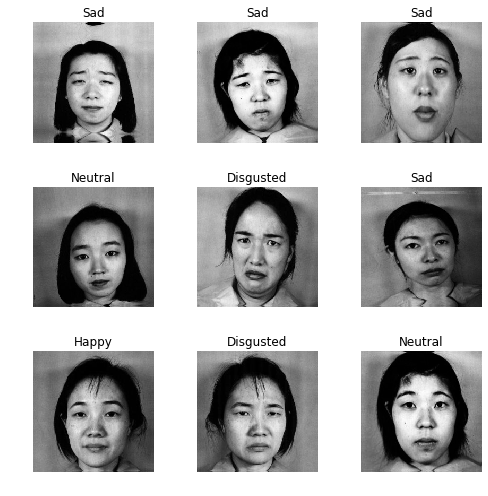

In [3]:
np.random.seed(2)
#data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=228, bs=bs)
data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(), size=228)
data.normalize(imagenet_stats)
data.show_batch(rows = 3, figsize = (7,7))
data.train_ds

In [4]:
print(data.classes)

['Angry', 'Disgusted', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']


In [7]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4)


e,p,o,c,h,,,t,r,a,i,n,_,l,o,s,s,,,v,a,l,i,d,_,l,o,s,s,,,a,c,c,u,r,a,c,y
1,,,,,,,2,.,4,9,4,5,3,3,,,,,2,.,1,0,3,0,1,5,,,,,0,.,1,6,3,9,3,4
2,,,,,,,2,.,2,9,4,2,2,1,,,,,1,.,9,0,3,6,1,4,,,,,0,.,1,1,4,7,5,4
3,,,,,,,2,.,0,4,3,6,0,0,,,,,1,.,8,5,6,3,6,5,,,,,0,.,1,6,3,9,3,4
4,,,,,,,1,.,8,2,3,8,4,1,,,,,1,.,8,1,0,9,1,2,,,,,0,.,1,6,3,9,3,4


In [10]:
learn.unfreeze()

In [11]:
learn.fit_one_cycle(1)

e,p,o,c,h,,,t,r,a,i,n,_,l,o,s,s,,,v,a,l,i,d,_,l,o,s,s,,,a,c,c,u,r,a,c,y
1,,,,,,,1,.,1,9,2,1,9,5,,,,,9,.,3,3,6,9,9,4,,,,,0,.,1,4,7,5,4,1


In [51]:
learn.save('stage-1')

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

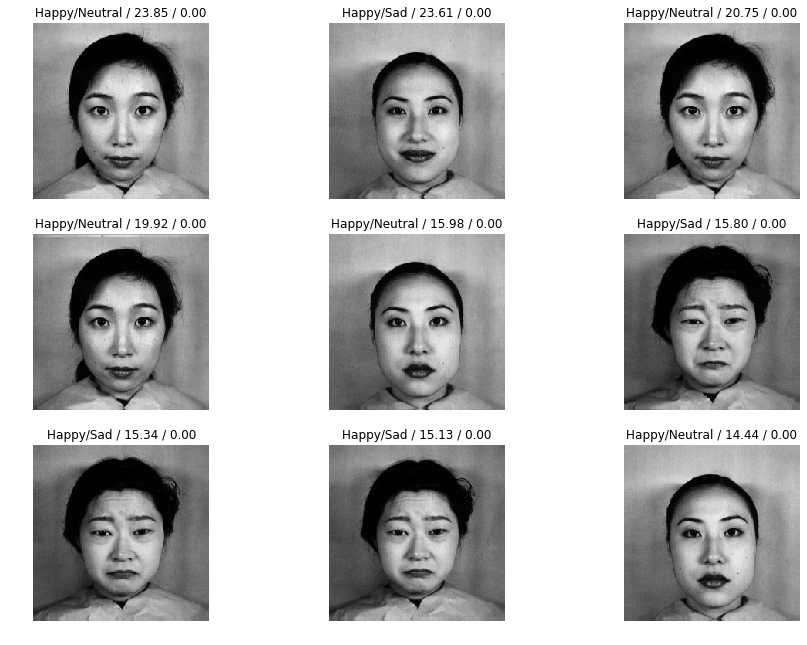

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
doc(interp.plot_top_losses)

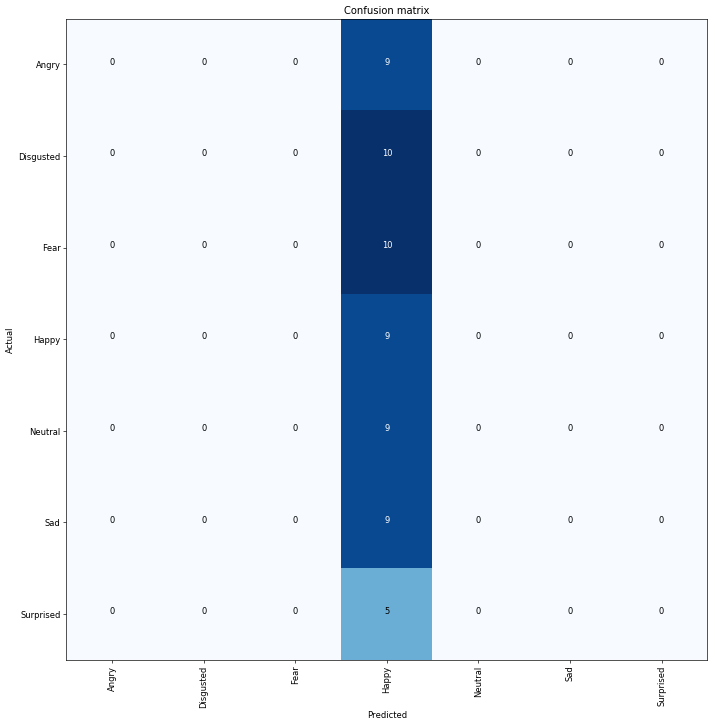

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)